# Fraud Detection System for Online Transactions
## Project 4: Machine Learning Integration

# Exploratory Data Analysis (EDA)

## Step 1: Load required libraries and data

In [1]:
# Import dependencies
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
file_path1 = Path("Resources/test_identity.csv")
file_path2 = Path("Resources/test_transaction.csv")
file_path3 = Path("Resources/train_identity.csv")
file_path4 = Path("Resources/train_transaction.csv")

In [3]:
# Read the data
test_identity = pd.read_csv(file_path1)
test_transaction = pd.read_csv(file_path2)
train_identity = pd.read_csv(file_path3)
train_transaction = pd.read_csv(file_path4)

Note: The dataset contains information about the identity and transactions made by the individuals in train and test set

# Step 2: Exploring the Data

In [4]:
# get shape of the data
print("test_identity Shape: ", test_identity.shape)
print("test_transaction Shape: ", test_transaction.shape)
print("train_identity Shape: ", train_identity.shape)
print("train_transaction Shape: ", train_transaction.shape)

test_identity Shape:  (141907, 41)
test_transaction Shape:  (506691, 393)
train_identity Shape:  (144233, 41)
train_transaction Shape:  (590540, 394)


In [5]:
# print first five rows of each dataset
print(test_identity.head())
print(test_transaction.head())
print(train_identity.head())
print(train_transaction.head(2))


   TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id-09  ...                    id-31  id-32     id-33           id-34  \
0    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   
1    0.0  ...  chrome 67.0 for android   24.0  1280x720  match_status:2   
2    NaN  ...       ie 11.0 for tablet    NaN       NaN             NaN   
3    0.0  ...  chrome 67.0 for android    NaN       NaN             NaN   
4    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   

   id-35 id-36 id-37  id-38  DeviceType                   DeviceInfo  
0  

In [6]:
# get information about the data
print(test_identity.info())
print(test_transaction.info())
print(train_identity.info())
print(train_transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  141907 non-null  int64  
 1   id-01          141907 non-null  float64
 2   id-02          136976 non-null  float64
 3   id-03          66481 non-null   float64
 4   id-04          66481 non-null   float64
 5   id-05          134750 non-null  float64
 6   id-06          134750 non-null  float64
 7   id-07          5059 non-null    float64
 8   id-08          5059 non-null    float64
 9   id-09          74338 non-null   float64
 10  id-10          74338 non-null   float64
 11  id-11          136778 non-null  float64
 12  id-12          141907 non-null  object 
 13  id-13          130286 non-null  float64
 14  id-14          71357 non-null   float64
 15  id-15          136977 non-null  object 
 16  id-16          125747 non-null  object 
 17  id-17          135966 non-nul

# Note:
** the train and test datasets have a column TransactionID,
which can be used as the unique identifier for each transaction.
** The transaction files contain information such as transaction amount, time, and card information, while the identity files contain information such as device type, device info, and several ID columns
** train dataset has a target column called isFraud

In [7]:
# get descriptive statistics for each dataset
print(test_identity.describe())
print(test_transaction.describe())
print(train_identity.describe())
print(train_transaction.describe())

       TransactionID          id-01          id-02         id-03  \
count   1.419070e+05  141907.000000  136976.000000  66481.000000   
mean    3.972166e+06     -11.325734  192658.729909      0.053008   
std     1.469966e+05      14.508520  182613.277215      0.684551   
min     3.663586e+06    -100.000000       2.000000    -12.000000   
25%     3.859268e+06     -12.500000   63339.500000      0.000000   
50%     4.001774e+06      -5.000000  133189.500000      0.000000   
75%     4.105284e+06      -5.000000  265717.500000      0.000000   
max     4.170239e+06       0.000000  999869.000000     11.000000   

              id-04          id-05          id-06        id-07        id-08  \
count  66481.000000  134750.000000  134750.000000  5059.000000  5059.000000   
mean      -0.087454       1.246033      -6.803829    12.493180   -36.577782   
std        0.840351       5.071394      15.921457    11.678206    25.544185   
min      -19.000000     -81.000000    -100.000000   -41.000000  -100.00

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

# Step 3: Missing Values:

In [8]:
# check for missing values
print(test_identity.isnull().sum())
print(test_transaction.isnull().sum())
print(train_identity.isnull().sum())
print(train_transaction.isnull().sum())

TransactionID         0
id-01                 0
id-02              4931
id-03             75426
id-04             75426
id-05              7157
id-06              7157
id-07            136848
id-08            136848
id-09             67569
id-10             67569
id-11              5129
id-12                 0
id-13             11621
id-14             70550
id-15              4930
id-16             16160
id-17              5941
id-18             91032
id-19              6001
id-20              6274
id-21            136848
id-22            136845
id-23            136845
id-24            137167
id-25            136868
id-26            136860
id-27            136845
id-28              5129
id-29              5129
id-30             71248
id-31              5282
id-32             71236
id-33             71236
id-34             69732
id-35              4930
id-36              4930
id-37              4930
id-38              4930
DeviceType         4976
DeviceInfo        26850
dtype: int64
Tra

Note:the number of missing values in each column of the given data frames. The columns with a high number of 
missing values is not be useful in modeling and need to be dropped.

In [9]:
# get percentage of missing values in each dataset
print(test_identity.isnull().sum()/len(test_identity))
print(test_transaction.isnull().sum()/len(test_transaction))
print(train_identity.isnull().sum()/len(train_identity))
print(train_transaction.isnull().sum()/len(train_transaction))

TransactionID    0.000000
id-01            0.000000
id-02            0.034748
id-03            0.531517
id-04            0.531517
id-05            0.050434
id-06            0.050434
id-07            0.964350
id-08            0.964350
id-09            0.476150
id-10            0.476150
id-11            0.036143
id-12            0.000000
id-13            0.081892
id-14            0.497157
id-15            0.034741
id-16            0.113877
id-17            0.041865
id-18            0.641491
id-19            0.042288
id-20            0.044212
id-21            0.964350
id-22            0.964329
id-23            0.964329
id-24            0.966598
id-25            0.964491
id-26            0.964434
id-27            0.964329
id-28            0.036143
id-29            0.036143
id-30            0.502075
id-31            0.037222
id-32            0.501991
id-33            0.501991
id-34            0.491392
id-35            0.034741
id-36            0.034741
id-37            0.034741
id-38       

# Step 4:  Duplicate  Values:

In [10]:
# Check for Duplicate Values:
test_identity.duplicated().sum()
test_transaction.duplicated().sum()
train_identity.duplicated().sum()
train_transaction.duplicated().sum()

0

# Step 5:Merge data

In [11]:
# Merge the two dataframes
test_df = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
train_df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
merged_df = pd.concat([train_df, test_df])



In [12]:
merged_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38
0,2987000,0.0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0.0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0.0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0.0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0.0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


note: drop columns with a missing value percentage greater than a certain threshold (let's say 50%)

In [13]:
# Drop columns with more than 50% missing values
merged_df.dropna(thresh=len(merged_df)*0.5, axis=1, inplace=True)

In [14]:
# Fill missing numerical values with mean
numeric_cols = merged_df.select_dtypes(include='number').columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

In [15]:
# Fill missing categorical values with mode
cat_cols = merged_df.select_dtypes(include='object').columns
merged_df[cat_cols] = merged_df[cat_cols].fillna(merged_df[cat_cols].mode().iloc[0])


In [16]:
# check data types
print(merged_df.dtypes)

TransactionID       int64
isFraud           float64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V317              float64
V318              float64
V319              float64
V320              float64
V321              float64
Length: 221, dtype: object


# Step 6: visualize relationship between  features

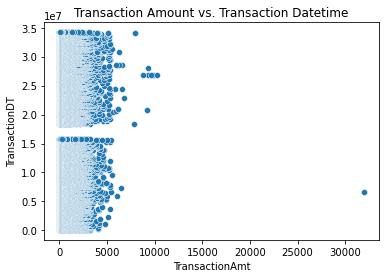

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize relationship between two numerical features
sns.scatterplot(data=merged_df, x='TransactionAmt', y='TransactionDT')
plt.title('Transaction Amount vs. Transaction Datetime')
plt.show()


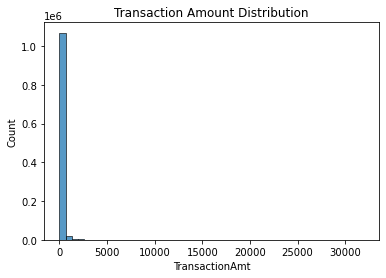

In [18]:
# Histogram to visualize distribution of a numerical feature
sns.histplot(data=merged_df, x='TransactionAmt', bins=50)
plt.title('Transaction Amount Distribution')
plt.show()

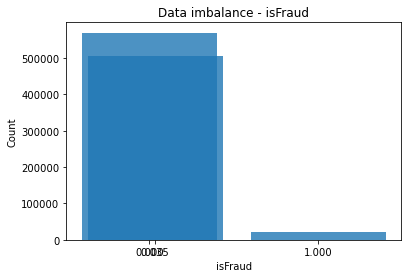

In [19]:
x = merged_df['isFraud'].value_counts().index
y = merged_df['isFraud'].value_counts().values

fig, ax = plt.subplots()
ax.bar(x, y, alpha=0.8)

ax.set_title('Data imbalance - isFraud')
ax.set_ylabel('Count')
ax.set_xlabel('isFraud')
ax.set_xticks(x)

plt.show()

In [20]:
# # calculate correlation matrix
# corr_matrix = merged_df.corr()

# # visualize correlation matrix
# import seaborn as sns

# sns.heatmap(corr_matrix, annot=True, cmap='Blues')
# plt.show()

In [21]:
merged_df 

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0.00000,86400,68.500,W,13926,363.099769,150.0,discover,142.0,...,0.0,0.0000,0.0000,0.0000,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0.00000,86401,29.000,W,2755,404.000000,150.0,mastercard,102.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0.00000,86469,59.000,W,4663,490.000000,150.0,visa,166.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0.00000,86499,50.000,W,18132,567.000000,150.0,mastercard,117.0,...,135.0,0.0000,0.0000,0.0000,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0.00000,86506,50.000,H,4497,514.000000,150.0,mastercard,102.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,0.03499,34214279,94.679,C,13832,375.000000,185.0,mastercard,224.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
506687,4170236,0.03499,34214287,12.173,C,3154,408.000000,185.0,mastercard,224.0,...,0.0,31.7237,31.7237,31.7237,0.0,0.0,0.0,0.0,0.0,0.0
506688,4170237,0.03499,34214326,49.000,W,16661,490.000000,150.0,visa,226.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
506689,4170238,0.03499,34214337,202.000,W,16621,516.000000,150.0,mastercard,224.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


# Step 8: Save data to new csv files

In [22]:
import os
merged_df.to_csv('merged_df.csv', index=False)



# NOTE: PERFORM NEXT MACHINE LEARNING STEPS ALSO VISUALIZATION if you want